# 支持向量机
- 找出一条最合适的线来分开数据
- 也就是找出一条线，使得每个点到这条线的距离最短
- 分为线性可分和线性不可分

In [2]:
# 官方使用例子
from sklearn import svm
X = [[0, 0], [1, 1]]
y = [0, 1]
clf = svm.SVC(gamma='scale')
clf.fit(X, y) 

SVC()

In [7]:
#预测一个值
print(clf)
clf.predict([[2., 2.]])

SVC()


array([1])

- SVMs 决策函数取决于训练集的一些子集, 称作**支持向量**. 这些支持向量的部分特性可以在 support_vectors_, support_ 和 n_support 找到:

In [9]:
# 支持向量里面的点
print(clf.support_vectors_)
# 第0，1个点
print(clf.support_)
# 找到的支持向量
print(clf.n_support_)

[[0. 0.]
 [1. 1.]]
[0 1]
[1 1]


In [1]:
import numpy as np
import pylab as pl
from sklearn import svm

w:  [0.80308864 0.63684294]
a:  -1.261046617810581
support_vectors_:  [[-0.50751495  0.0494742 ]
 [ 1.02142007  1.26190758]]
clf.coef_:  [[0.80308864 0.63684294]]


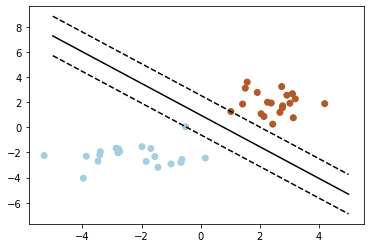

In [3]:
# we create 40 separable points
X = np.r_[np.random.randn(20, 2) - [2, 2], np.random.randn(20, 2) + [2, 2]]
Y = [0]*20 +[1]*20

#fit the model
clf = svm.SVC(kernel='linear')
clf.fit(X, Y)

# get the separating hyperplane
w = clf.coef_[0]
a = -w[0]/w[1]
xx = np.linspace(-5, 5)
yy = a*xx - (clf.intercept_[0])/w[1]

# plot the parallels to the separating hyperplane that pass through the support vectors
b = clf.support_vectors_[0]
yy_down = a*xx + (b[1] - a*b[0])
b = clf.support_vectors_[-1]
yy_up = a*xx + (b[1] - a*b[0])

print ("w: ", w)
print ("a: ", a)

# print "xx: ", xx
# print "yy: ", yy
print("support_vectors_: ", clf.support_vectors_)
print("clf.coef_: ", clf.coef_)

# switching to the generic n-dimensional parameterization of the hyperplan to the 2D-specific equation
# of a line y=a.x +b: the generic w_0x + w_1y +w_3=0 can be rewritten y = -(w_0/w_1) x + (w_3/w_1)


# plot the line, the points, and the nearest vectors to the plane
pl.plot(xx, yy, 'k-')
pl.plot(xx, yy_down, 'k--')
pl.plot(xx, yy_up, 'k--')

pl.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
          s=80, facecolors='none')
pl.scatter(X[:, 0], X[:, 1], c=Y, cmap=pl.cm.Paired)

pl.axis('tight')
pl.show()